In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import pathlib
CWD = str(pathlib.Path().resolve())

# 1. Availability 

1. Look at the user ids 
2. Find most frequent requests
3. See if the requests are occuring concurrently 

In [5]:
USER_REQUEST_PATH = CWD + "/../statuses/online_testing/online_test_data_real.csv" 

In [4]:
user_req_df = pd.read_csv(USER_REQUEST_PATH)

In [5]:
user_req_df.head()

,user,recommendations,watched movie,rated movie,rating
0,31622,"['eyewitness+1981', 'my+life+in+pink+1997', 'f...",tales+from+earthsea+2006,NaN,NaN
1,172823,"['my+summer+of+love+2004', 'my+one+and+only+20...",my+one+and+only+2009,NaN,NaN
2,94467,"['explorers+1985', 'swordfish+2001', 'running+...",explorers+1985,NaN,NaN
3,273180,"['cypher+2002', 'mystery+men+1999', 'mysteriou...",bad+education+2004,NaN,NaN
4,327845,"['my+side+of+the+mountain+1969', 'synecdoche_+...",se7en+1995,NaN,NaN


In [6]:
user_ids = user_req_df["user"]

In [19]:
mulitple_requests = user_ids[user_ids.duplicated(keep=False)]

In [28]:
mulitple_requests.count()

28

Checking for multiple user requests 

(array([4., 2., 2., 4., 2., 2., 4., 2., 2., 4.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ]),
 <BarContainer object of 10 artists>)

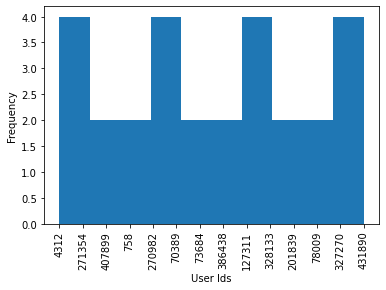

In [24]:
plt.xlabel("User Ids")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.hist(mulitple_requests)

In [48]:
#Check if requests in a list occur within an interval
def concurrent_requests(requests, interval):
    for idx in range(len(requests)-1):
        if (requests[idx+1]-requests[idx])>interval:
            return False
    return True

In [49]:
concurrent_requests([1,2,10],4)

False

In [51]:
concurrent_req_count = 0

for user_id in mulitple_requests.unique():
    indices = mulitple_requests[mulitple_requests==user_id].index.to_list()
    concurrent = False
    if concurrent_requests(indices, interval=4):
        print(user_id, indices)
        concurrent_req_count +=1

if concurrent_req_count == 0:
    print("No suspicious requests found!")

No suspicious requests found!


# 2. Integrity

In [86]:
# Same file as user request file
USER_DATA_PATH = CWD + "/../statuses/online_testing/online_test_data_real.csv" 

In [87]:
user_data_df = pd.read_csv(USER_REQUEST_PATH)

In [88]:
#Finding movies that user has rated

user_rated_df = user_data_df[user_data_df['rating'].astype(str).apply(str.isdigit)]


In [89]:
user_rated_df

,user,recommendations,watched movie,rated movie,rating
6,344914,"['my+summer+of+love+2004', 'my+one+and+only+20...",kikis+delivery+service+1989,kikis+delivery+service+1989,5
15,265736,"['my+boyfriends+back+1993', 'two+if+by+sea+199...",run_+simon_+run+1970,run_+simon_+run+1970,3
33,237184,"['axed+2012', 'swordfish+2001', 'two+english+g...",NaN,in+the+heat+of+the+night+1967,4
34,453273,"['mystery+date+1991', 'two+if+by+sea+1996', 't...",stardust+2007,stardust+2007,4
80,161022,"['fx+1986', 'evolver+1994', 'pumpkin+2002', 'q...",casino+royale+2006,casino+royale+2006,5
...,...,...,...,...,...
9319,32636,"['my+darling+clementine+1946', 'eyewitness+198...",NaN,harry+potter+and+the+chamber+of+secrets+2002,4
9324,68341,"['my+one+and+only+2009', 'evolution+2001', 'su...",what+if+2013,what+if+2013,4
9328,273830,"['executive+decision+1996', 'even+money+2006',...",turtles+forever+2009,turtles+forever+2009,2
9330,329279,"['away+from+her+2006', 'dutch+1991', 'funny+fa...",green+chair+2005,green+chair+2005,3


In [90]:
low_rated_movies = user_rated_df[user_rated_df['rating'].astype(int)<3]

In [91]:
low_rated_movies

,user,recommendations,watched movie,rated movie,rating
98,134637,"['evolver+1994', 'quick+change+1990', 'mutant+...",NaN,insurgent+2015,2
365,193161,"['my+dog+skip+2000', 'my+side+of+the+mountain+...",on+tour+2010,on+tour+2010,2
800,370967,"['mystery_+alaska+1999', 'my+bloody+valentine+...",the+boy+in+the+striped+pyjamas+2008,the+boy+in+the+striped+pyjamas+2008,2
1387,126432,"['my+darling+clementine+1946', 'rush+1991', 'b...",finding+forrester+2000,finding+forrester+2000,2
1550,251738,"['swamp+thing+1982', 'fubar+2002', 'runaway+19...",the+friends+of+eddie+coyle+1973,the+friends+of+eddie+coyle+1973,2
2087,32746,"['executive+decision+1996', 'away+from+her+200...",the+boy+in+the+striped+pyjamas+2008,the+boy+in+the+striped+pyjamas+2008,2
2334,342985,"['my+sister+eileen+1955', 'eye+of+god+1997', '...",NaN,beau+brummel+1924,2
2964,251534,"['my+life+1993', 'away+from+her+2006', 'dutch+...",dance+me+outside+1995,dance+me+outside+1995,2
3680,464044,"['azumi+2003', 'my+man+godfrey+1957', 'my+one+...",the+appaloosa+1966,the+appaloosa+1966,2
4286,245132,"['my+boyfriends+back+1993', 'axed+2012', 'swin...",district+13+ultimatum+2009,district+13+ultimatum+2009,2


In [92]:
low_rated_movies[low_rated_movies["user"].duplicated()] # Find users who have rated multiple movies

,user,recommendations,watched movie,rated movie,rating


low_rated_movies[low_rated_movies["rated"].duplicated()] 

In [93]:
badly_rated_movies = low_rated_movies[low_rated_movies["rated movie"].duplicated(keep=False)]

In [94]:
badly_rated_movies.loc[:,["user","rated movie", "rating"]]

,user,rated movie,rating
800,370967,the+boy+in+the+striped+pyjamas+2008,2
2087,32746,the+boy+in+the+striped+pyjamas+2008,2
5051,35493,eyewitness+1981,2
5624,117812,eyewitness+1981,2


In [96]:
for movie in badly_rated_movies["rated movie"].unique():
    all_ratings = user_rated_df[user_rated_df["rated movie"]==movie]["rating"].astype(int)
    movie_df = badly_rated_movies[badly_rated_movies["rated movie"]==movie]["rating"]
    actual_mean = np.mean(all_ratings.values)
    print(f"Actual mean rating of {movie}: {actual_mean}")
    print("Ratings given:\n",movie_df,sep='')
    print(f"Number of outliers: {len(movie_df)}/{len(all_ratings)}")


Actual mean rating of the+boy+in+the+striped+pyjamas+2008: 3.2
Ratings given:
800     2
2087    2
Name: rating, dtype: object
Number of outliers: 2/5
Actual mean rating of eyewitness+1981: 3.0
Ratings given:
5051    2
5624    2
Name: rating, dtype: object
Number of outliers: 2/5
